## Содержание

1. Импорт данных и пакетов Python
2. Оценка качества данных и отсутствующих значений
3. Исследовательский анализ данных
4. Логистическая регрессия и результаты

## 1. Импорт данных и пакетов Python

In [1]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("V_C_train.csv", sep=';')

# Read CSV test data file into DataFrame
test_df = pd.read_csv("V_C_test.csv", sep=';')

In [3]:
# preview train data
train_df.drop(train_df.columns[[0]], axis=1, inplace=True)
#Lets look into top few rows and columns in the dataset
train_df.head()

,churn,totalnightcalls,internationalplan,totaleveminutes,totalintlcharge,totalevecharge,totalnightminutes,totaldaycalls,numbervmailmessages,totalevecalls
0,0,99,0,0,2.75,10.51,2,99,0,133
1,0,95,0,1,2.84,14.88,1,74,0,84
2,1,94,0,2,4.43,19.22,1,119,0,94
3,0,136,1,2,2.62,18.67,2,118,34,105
4,0,70,0,2,2.97,20.02,3,95,33,128


In [4]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 900.


In [5]:
# preview test data
test_df.drop(test_df.columns[[0]], axis=1, inplace=True)
#Lets look into top few rows and columns in the dataset
test_df.head()

,churn,totalnightcalls,internationalplan,totaleveminutes,totalintlcharge,totalevecharge,totalnightminutes,totaldaycalls,numbervmailmessages,totalevecalls
0,0,67,0,3,2.84,21.29,1,68,0,53
1,1,119,0,3,1.59,22.63,3,100,0,78
2,0,92,0,2,2.57,18.96,0,85,21,79
3,0,73,0,2,1.03,18.99,3,59,27,111
4,0,92,0,3,1.73,21.83,3,101,40,88


In [6]:
print('The number of samples into the train data is {}.'.format(test_df.shape[0]))

The number of samples into the train data is 100.


In [7]:
# check missing values in train data
train_df.isnull().sum()

churn                  0
totalnightcalls        0
internationalplan      0
totaleveminutes        0
totalintlcharge        0
totalevecharge         0
totalnightminutes      0
totaldaycalls          0
numbervmailmessages    0
totalevecalls          0
dtype: int64

## 2. Оценка качества данных 

#### 2.1. Построим гистограммы распределения частот признаков

total night calls distribution:
109    27
105    27
102    25
99     24
96     23
       ..
156     1
157     1
158     1
165     1
0       1
Name: totalnightcalls, Length: 113, dtype: int64


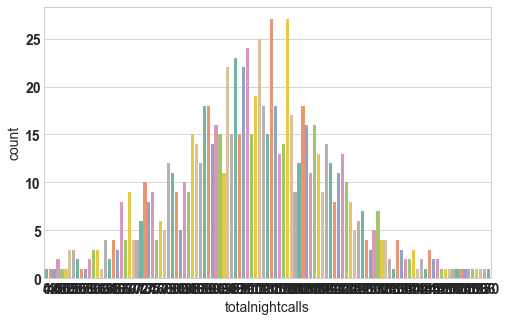

In [8]:
print('total night calls distribution:')
print(train_df['totalnightcalls'].value_counts())
sns.countplot(x='totalnightcalls', data=train_df, palette='Set2')
plt.show()

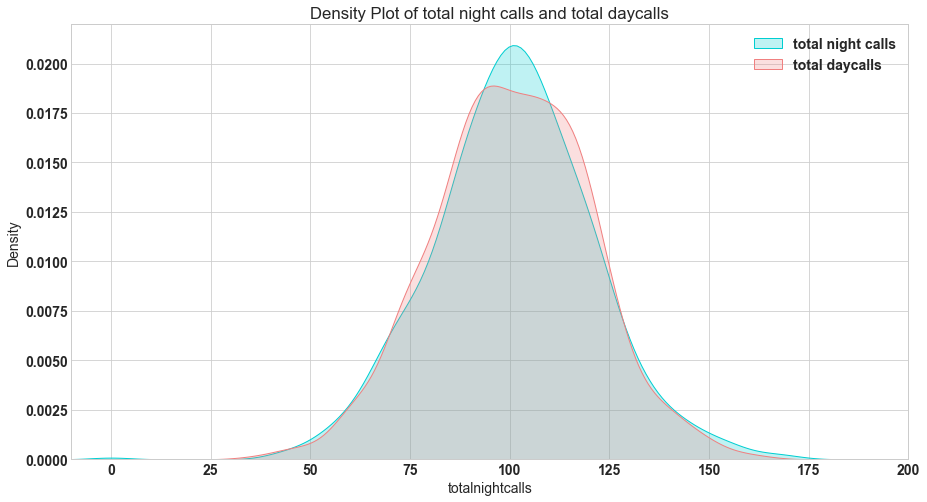

In [9]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_df["totalnightcalls"], color="darkturquoise", shade=True)
sns.kdeplot(train_df["totaldaycalls"], color="lightcoral", shade=True)
plt.legend(['total night calls', 'total daycalls'])
plt.title('Density Plot of total night calls and total daycalls')
ax.set(xlabel='totalnightcalls')
plt.xlim(-10,200)
plt.show()

In [10]:
train_df.columns

Index(['churn', 'totalnightcalls', 'internationalplan', 'totaleveminutes',
       'totalintlcharge', 'totalevecharge', 'totalnightminutes',
       'totaldaycalls', 'numbervmailmessages', 'totalevecalls'],
      dtype='object')

# Логистическая регрессия и результаты

При наличии внешней функции оуенки, которая назначает веса признакам, рекурсивное исключение признаков (RFE) заключается в выборе признаков путем рекурсивного рассмотрения все меньших наборов признаков. Сначала оценщик обучается на начальном наборе функций, и важность каждой функции определяется либо с помощью атрибута coef_, либо с помощью атрибута feature_importances_. Затем наименее важные функции удаляются из текущего набора функций. Эта процедура рекурсивно повторяется для сокращенного набора до тех пор, пока в конечном итоге не будет достигнуто желаемое количество функций для выбора.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ['totalnightcalls', 'internationalplan', 'totaleveminutes',
       'totalintlcharge', 'totalevecharge', 'totalnightminutes',
       'totaldaycalls', 'numbervmailmessages', 'totalevecalls']  
X = train_df[cols]
y = train_df['churn']
# Build a logreg and compute the feature importances
model = LogisticRegression(solver='lbfgs', max_iter=10000)
# create the RFE model and select 8 attributes
rfe = RFE(model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['internationalplan', 'totaleveminutes', 'totalintlcharge', 'totalnightminutes']


## 4.1.2. Ранжирование функций с рекурсивным удалением функций и перекрестной проверкой
RFECV выполняет RFE в цикле перекрестной проверки, чтобы найти оптимальное или лучшее количество функций. В дальнейшем рекурсивное исключение функции применяется к логистической регрессии с автоматической настройкой количества функций, выбранных с перекрестной проверкой.

Optimal number of features: 4
Selected features: ['internationalplan', 'totaleveminutes', 'totalintlcharge', 'totalnightminutes']


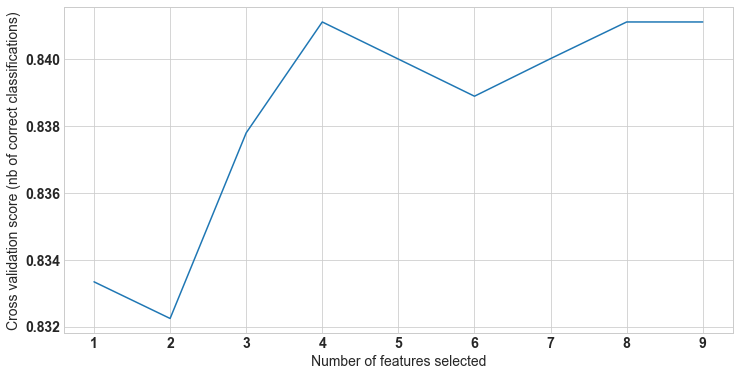

In [12]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(solver='lbfgs', max_iter=1000), step=1, cv=11, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

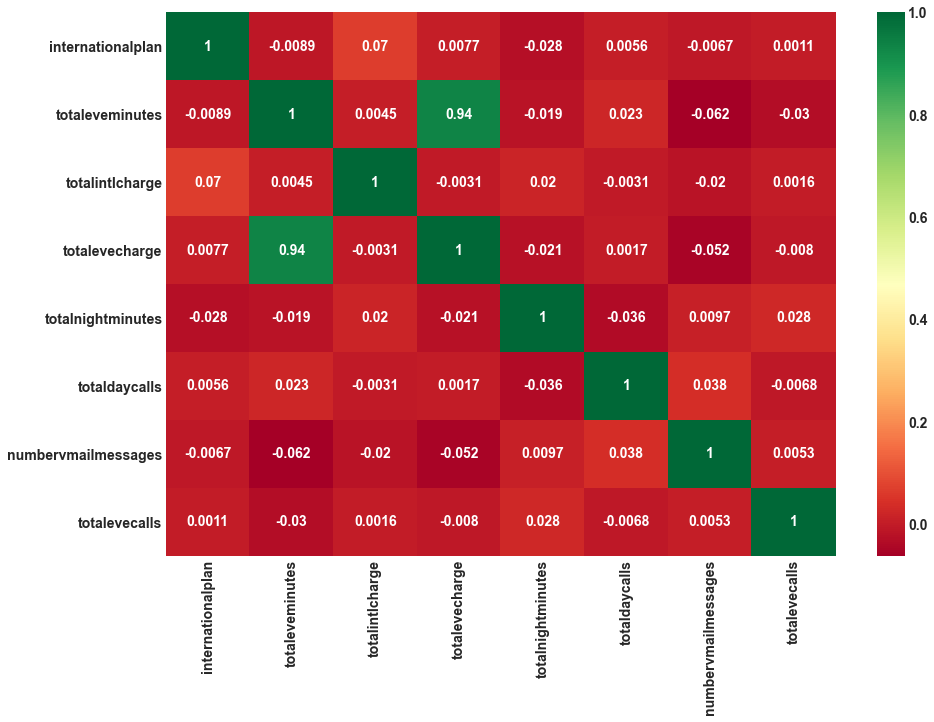

In [13]:
Selected_features = ['internationalplan', 'totaleveminutes', 'totalintlcharge', 'totalevecharge', 'totalnightminutes', 'totaldaycalls', 'numbervmailmessages', 'totalevecalls']

X = train_df[Selected_features]

plt.subplots(figsize=(15, 10))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## 4.2. Обзор процедур оценки модели
Нужен способ выбора между моделями машинного обучения.

Цель состоит в том, чтобы оценить вероятную производительность модели на данных вне выборки.
Первоначальная идея: тренировать и тестировать на одних и тех же данных

Но максимальная точность обучения вознаграждает слишком сложные модели, которые не соответствуют обучающим данным.
Альтернативная идея: разделить тренировку / тест

Разделить набор данных на две части, чтобы модель можно было обучить и протестировать на разных данных.
Точность тестирования - лучшая оценка, чем точность обучения производительности вне выборки
Проблема с разделением тренировка / тест
Он обеспечивает высокую оценку дисперсии, поскольку изменение того, какие наблюдения есть в наборе для тестирования, может значительно изменить точность тестирования.
Точность тестирования может сильно измениться в зависимости от того, какое наблюдение входит в набор для тестирования.

#### 4.2.1. Оценка модели на основе простого разделения тренировка / тест с использованием функции train_test_split ()

Train/Test split results:
LogisticRegression accuracy is 0.840
LogisticRegression log_loss is 0.411
LogisticRegression auc is 0.713


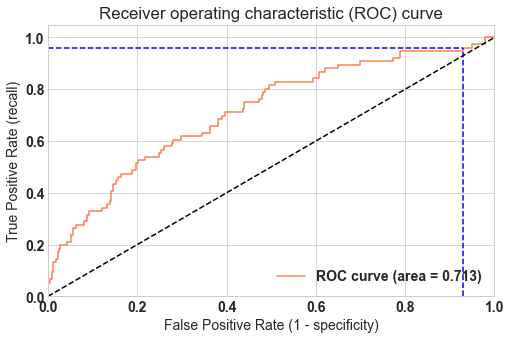

Using a threshold of 0.051 guarantees a sensitivity of 0.961 and a specificity of 0.070, i.e. a false positive rate of 93.05%.


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = train_df[Selected_features]
y = train_df['churn']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

#### 4.2.2. Оценка модели на основе K-fold перекрестной проверки с использованием функции cross_val_score ()

In [15]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.842
LogisticRegression average log_loss is 0.415
LogisticRegression average auc is 0.698


#### 4.2.3. Оценка модели на основе K-fold перекрестной проверки с использованием функции cross_validate ()

In [16]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression(solver='lbfgs', max_iter=1000)

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.842 (+/-0.008)
LogisticRegression average log_loss: 0.415 (+/-0.028)
LogisticRegression average auc: 0.698 (+/-0.076)


In [17]:
cols = ['internationalplan', 'totaleveminutes', 'totalintlcharge', 'totalnightminutes']
X = train_df[cols]

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, train_df[cols], y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.842 (+/-0.012)
LogisticRegression average log_loss: 0.420 (+/-0.025)
LogisticRegression average auc: 0.667 (+/-0.088)


#### 4.3. Оценка GridSearchCV с использованием нескольких счетчиков одновременно

best params: LogisticRegression(C=0.90001, max_iter=1000)
best params: {'C': 0.90001}
best score: 0.8422222222222222


<ipython-input-18-e11e42d54abf>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


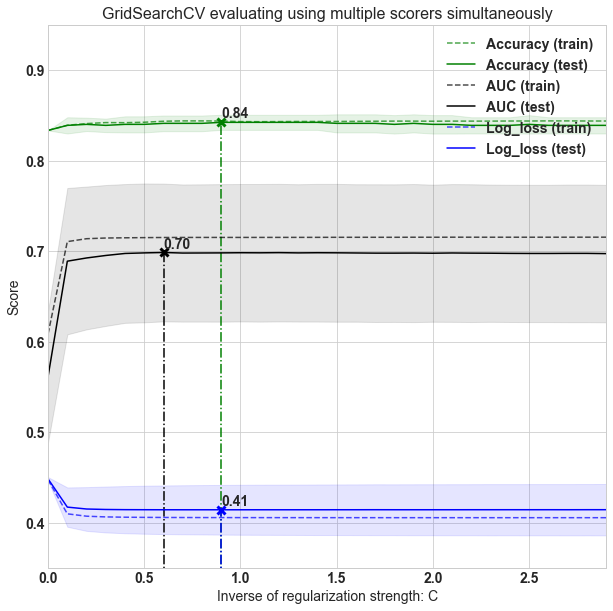

In [18]:
from sklearn.model_selection import GridSearchCV

X = train_df[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(solver='lbfgs', max_iter=1000), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

#### 4.4. Оценка GridSearchCV с использованием нескольких счетчиков, RepeatedStratifiedKFold для одновременной предварительной обработки
Мы можем применить множество оценок вместе для более глубокой оценки, например, gridsearch, используя перекрестную проверку, основанную на многократно повторяемых k-кратных суммах, которые можно масштабировать или не масштабировать по отношению ко многим оценкам и настраивать параметр для данной оценочной функции!

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=0.60001, max_iter=1000))])
best params: {'clf__C': 0.60001}
best score: 0.841111111111111


<ipython-input-19-f71329e8b85a>:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


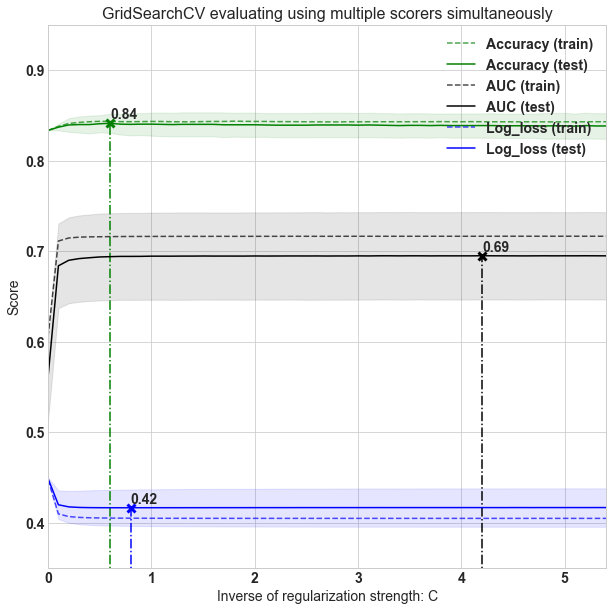

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()